# Введение

В ходе выполнения первых 4 домашних заданий "Формальные языки" было реализовано 2 алгоритма для выполнения регулярных запросов к графам.
В основе первого алгоритма лежит идея нахождения пересечения графа и регулярного выражения как конечных автоматов, с послеюдующим нахождением транзитивного замыкания для полученного графа.
В основе второго алгоритма лежит идея синхронного обхода в ширину графа и конечного автомата, задающего регулярное выражение.

Целью данной работы является сравнение полученных решений с целью определить, какая из 2 реализаций регулярных запросов к графам является более быстрой при различных начальных условиях.

# Описание исследуемых решений

### Алгоритм 1

##### Идея

Так как мы имеем граф с метками на ребрах, множество начальных вершин и множество конечных вершин, мы можем рассматривать граф как конечный автомат с начальными и конечными состояниями, задающий некоторый язык. На этом наблюдении основан первый алгоритм:
1. Представляем граф как конечный автомат
2. Представляем регулярное выражение, задающее регулярный запрос, как конечный автомат
3. Находим пересечение этих автоматов
4. Находим все пары состояний в полученном на 3 шагу автомате, между которыми можно построить путь

В автомате, который получается на 3 шаге алгоритма, состояниями являются пары вида $Q_I = \{(u, v) | u \in Q_G, v \in Q_R \}$, где $Q_G$ - набор состояний графа как конечного автомата, а $Q_R$ - набор состояний регулярного выражения как конечного автомата. По построению, если между двумя состояниями $q_1 = (u_1, v_1), q_2 = (u_2, v_2) \in Q_I$ существует путь, то существует путь и между состояниями $u_1, u_2$ в графе, а также между состояниями $v_1, v_2$ в регулярном выражении. Таким образом, когда мы на 4 шагу находим транзитивное замыкание пересечения языков графа и регулярного выражения как конечного автомата, мы получаем всю необходимую информацию для ответа на регулярный запрос.

###### Детали реализации

Автоматы, представляющие граф и регулярное выражение, хранятся в памяти как булева декомпозиция. Автомат, представляющий язык пересечение графа и регулярного выражения, получается как произведение Кронекера для соответсвующих матриц внутри булевых декомпозиций графа и регулярного выражения. Для нахождения пар всех достижимых состояний внутри автомата-пересечения используется матричное умножение матрицы смежности автомата-пересечения на саму себя (таким образом находится транзитивное замыкание).

### Алгоритм 2

##### Идея

По шагам, второй алгоритм можно расписать так:
1. Фиксируем пары $(u, v)$, где $u$ - начальная вершина графа, а $v$ - некоторое начальное состояние регулярного выражения как конечного автомата, и все такие пары добавляем в множество $Query$
2. Из множества пар $Query$, запускаем поиск в ширину, то есть находим все такие пары $(u_i, v_j)$, что $u_i \in Adj(u)$, $v_j \in Adj(v)$, где $Adj(u)$ - множество состояний, смежных с $u$. Все найденные пары мы добавляем в множество $Query$, а все отработанные вершины добавляем в множество $Visited$
3. Пока разность множеств $Query$ и $Visited$ не пуста, повторяем 2 шаг
4. В конце мы получим множество $Visited$ в котором будут все достижимые из начального множества вершины

##### Детали реализации

Также, как и в 1 алгоритме, автоматы, представляющие граф и регулярное выражение, хранятся в памяти как булева декомпозиция. Непосредственно сам обход в ширину производится как умножение матрицы "фронта обхода" (которая является матричным выражением множества $Query$), на каждую из матриц прямой суммы булевых декомпозиций графа и регулярного выражения. Множество $Visited$ тоже выражается как блочная матрица $Visited = [I_n M_{n*k}]$, где $I_n$ - единичная матрица n * n (n - количество состояний в автомате, представляющем регулярное выражение), а $M_{n*k}$ - такая матрица, что если $M[i, j] != 0$, то в состояние $i$ автомата-регулярного выражения можно прийти из начального множества по такому пути, что он закончится в вершине $j$ графа.


# Постановка задачи

Данная работа призвана ответить на следующие вопросы:
1. Какое представление разреженных матриц лучше подходит для каждой реализации алгоритма?
2. Начиная с какого размера начального множества задачу нахождения всех пар достижимых вершин выгоднее решать используя 1 алгоритм, чем 2 алгоритм?
3. На сколько реализация 2 алгоритм медленнее работает, если необходимо найти множества достижимых вершин для каждой из вершин начального множества?

# Набор данных для эксперимента

Для проведения экспериментов были использованы графы из [датасета](https://jetbrains-research.github.io/CFPQ_Data/dataset/index.html), а именно:
* [skos](https://jetbrains-research.github.io/CFPQ_Data/dataset/data/skos.html#skos)
* [bzip](https://jetbrains-research.github.io/CFPQ_Data/dataset/data/bzip.html#bzip)
* [funding](https://jetbrains-research.github.io/CFPQ_Data/dataset/data/funding.html#funding)
* [gzip](https://jetbrains-research.github.io/CFPQ_Data/dataset/data/gzip.html#gzip)

Выбор именно этих графов обусловлен тем, что:
1. Хотелось выбрать графы с различными (по размеру) алфавитами меток на ребрах
2. На больших графах, чем выбранные, замеры занимали слишком много времени на имеющемся железе

В качестве регулярных выражений для экспериментов были выбраны 3 вида:
1. Регулярное выражение, допускающее весь графа
2. Регулярное выражение, допускающее один символ из алфавита меток
3. Регулярное выражение, содержащее все основные конструкции регулярных выражений

# Описание эксперимента

### Оборудование

Все тесты производились на следующей конфигурации:
* Процессор
<pre>
Архитектура:             x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         39 bits physical, 48 bits virtual
  Порядок байт:          Little Endian
CPU(s):                  4
  On-line CPU(s) list:   0-3
ID прроизводителя:       GenuineIntel
  Имя модели:            Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz
    Семейство ЦПУ:       6
    Модель:              61
    Потоков на ядро:     2
    Ядер на сокет:       2
    Сокетов:             1
    Степпинг:            4
    CPU max MHz:         3000,0000
    CPU min MHz:         500,0000
    BogoMIPS:            4789.01
    Флаги:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mc
                         a cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss
                         ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc arc
                         h_perfmon pebs bts rep_good nopl xtopology nonstop_tsc
                         cpuid aperfmperf pni pclmulqdq dtes64 monitor ds_cpl vm
                         x est tm2 ssse3 sdbg fma cx16 xtpr pdcm pcid sse4_1 sse
                         4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave av
                         x f16c rdrand lahf_lm abm 3dnowprefetch cpuid_fault epb
                          invpcid_single pti ssbd ibrs ibpb stibp tpr_shadow vnm
                         i flexpriority ept vpid ept_ad fsgsbase tsc_adjust bmi1
                          avx2 smep bmi2 erms invpcid rdseed adx smap intel_pt x
                         saveopt dtherm ida arat pln pts md_clear flush_l1d
Virtualization features:
  Виртуализация:         VT-x
Caches (sum of all):
  L1d:                   64 KiB (2 instances)
  L1i:                   64 KiB (2 instances)
  L2:                    512 KiB (2 instances)
  L3:                    4 MiB (1 instance)
NUMA:
  NUMA node(s):          1
  NUMA node0 CPU(s):     0-3
Vulnerabilities:
  Itlb multihit:         KVM: Mitigation: VMX disabled
  L1tf:                  Mitigation; PTE Inversion; VMX conditional cache flushe
                         s, SMT vulnerable
  Mds:                   Mitigation; Clear CPU buffers; SMT vulnerable
  Meltdown:              Mitigation; PTI
  Mmio stale data:       Not affected
  Retbleed:              Not affected
  Spec store bypass:     Mitigation; Speculative Store Bypass disabled via prctl
                          and seccomp
  Spectre v1:            Mitigation; usercopy/swapgs barriers and __user pointer
                          sanitization
  Spectre v2:            Mitigation; Retpolines, IBPB conditional, IBRS_FW, STIB
                         P conditional, RSB filling, PBRSB-eIBRS Not affected
  Srbds:                 Mitigation; Microcode
  Tsx async abort:       Not affected
</pre>
* Оперативная память - 16 гигабайт

### Методика проведения замеров

Для проведения замеров времени выполнения регулярных запросов была написана функция time, которая позволяет заданное количество раз (в тестах автора это 100 раз) выполнить некоторый фрагмент кода, а также посчитать среднее время выполнения данного заданного фрагмента кода, а также узнать среднее квадратическое отклонение этого времени.

In [48]:
import random
import statistics

import prettytable
from prettytable import PrettyTable

from project.left_right_matrix import LeftRightMatrix
from timeit import timeit

from networkx import MultiDiGraph
from pyformlang.regular_expression import Regex

from project.graph_utils import from_graph_to_graph_data
from project.regular_path_query import regular_path_query, bfs_based_regular_path_query
from project.boolean_decomposition import BooleanDecomposition

import matplotlib.pyplot as plt
import numpy as np

import cfpq_data

def generate_regexes(graph: MultiDiGraph) -> list[Regex]:
    """
    Generates test regexes for given graph
    :param graph: graph, which alphabet must be used for regex
    :return: list or generated regexes
    """
    graph_data = from_graph_to_graph_data(graph)

    def regex1():
        string_regex = "|".join(graph_data.labels)
        return Regex(f'({string_regex})*')

    def regex2():
        string_regex = random.choice(list(graph_data.labels))
        return Regex(f'{string_regex}')

    def regex3():
        list_of_labels = list(graph_data.labels)
        a, b = random.choices(list_of_labels, k=2)
        while b == a:
            b = random.choice(list_of_labels)
        string_regex = f'{a}.{a}*.{b}'
        return Regex(string_regex)

    return [regex1(), regex2(), regex3()]

test_graph_names = ["skos", "bzip", "funding", "gzip"]
test_graphs = list(map(lambda name: cfpq_data.graph_from_csv(cfpq_data.dataset.download(name)), test_graph_names))
test_regexes = list(map(lambda graph: generate_regexes(graph), test_graphs))

execution_times_number = 100
def time(stmt) -> tuple[float, float]:
    """
    Measure time of execution of given statement
    :param stmt: statement which execution time must be measured
    :return: 2 element tuple with mean and standard deviation of measured times
    """
    times = []
    for i in range(execution_times_number):
        times.append(timeit(stmt=stmt, number=1))
    return statistics.mean(times), statistics.stdev(times)


def experiment_pass_regular_path_query(regex: Regex, graph: MultiDiGraph, start_states: list[any] = None, final_states: list[any] = None):
    """
    Statement, which will be measured with time function
    """
    regular_path_query(
        regex,
        graph,
        start_states,
        final_states
    )

def experiment_pass_bfs_based_regular_path_query(regex: Regex, graph: MultiDiGraph, separated: bool, start_states: list[any], final_states: list[any] = None):
    """
    Statement, which will be measured with time function
    """
    bfs_based_regular_path_query(
        regex,
        graph,
        separated,
        start_states,
        final_states
    )

def print_table(header: list[str], rows: list[list[any]]):
    """
    Utility function to print python results as table
    """
    table = PrettyTable()
    table.set_style(prettytable.MARKDOWN)
    table.field_names = header
    for row in rows:
        table.add_row(row)
    table.max_width = 50
    print(table)

[2022-10-29 21:59:33]>INFO>Found graph with name='skos'
[2022-10-29 21:59:33]>INFO>Load archive graph_archive=PosixPath('/home/user/PycharmProjects/formal-lang-course/venv/lib/python3.10/site-packages/cfpq_data/data/skos.tar.gz')
[2022-10-29 21:59:33]>INFO>Unzip graph name='skos' to file graph=PosixPath('/home/user/PycharmProjects/formal-lang-course/venv/lib/python3.10/site-packages/cfpq_data/data/skos/skos.csv')
[2022-10-29 21:59:33]>INFO>Remove archive graph_archive=PosixPath('/home/user/PycharmProjects/formal-lang-course/venv/lib/python3.10/site-packages/cfpq_data/data/skos.tar.gz')
[2022-10-29 21:59:33]>INFO>Load graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7fb79de9d6f0> from path=PosixPath('/home/user/PycharmProjects/formal-lang-course/venv/lib/python3.10/site-packages/cfpq_data/data/skos/skos.csv')
[2022-10-29 21:59:33]>INFO>Found graph with name='bzip'
[2022-10-29 21:59:34]>INFO>Load archive graph_archive=PosixPath('/home/user/PycharmProjects/formal-lang-course/

# Эксперимент

### Какое представление разреженных матриц лучше подходит для каждой реализации алгоритма?

В обоих алгоритмах приходится умножать матрицы, и в обоих алгоритмах это основная часть. В связи с этим было решено провести эксперимент с выбором различных представлений матрицы на моменте умножений. Внутри scipy есть два вида матриц для высокопроизводительных операций:
1. [csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix)
2. [csc_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_array.html#scipy.sparse.csc_array)

Так как вид регулярного выражения влияет на длительность выполнения функции и количество умножений матриц внутри каждой из реализаций, выберем такое, которое дает наибольшее количество матричных умножений (регулярное выражение, допускающее любое слово, составленное из меток графа). Составим запросы к графам и прведем замеры:

In [49]:
def set_mul_matrix_type_converter(converter):
    """
    :param converter: lambda which will be used before matrix multiplication to convert spmatrix to particular spmatrix format
    """
    BooleanDecomposition._convert_to_spmatrix = converter
    LeftRightMatrix._convert_to_spmatrix = converter

start_states = list(map(lambda graph: cfpq_data.generate_multiple_source(graph, 1), test_graphs)) # in this test, we do not care about the size and composition of the initial set

set_mul_matrix_type_converter(lambda mat: mat.tocsr())
regular_path_query_csr_results = []
bfs_based_regular_path_query_csr_results = []
for i in range(len(test_graphs)):
    graph = test_graphs[i]
    regex = test_regexes[i][0]
    regular_path_query_csr_results.append((test_graph_names[i], str(regex), time(lambda: experiment_pass_regular_path_query(regex, graph, start_states=start_states[i]))))
    bfs_based_regular_path_query_csr_results.append((test_graph_names[i], str(regex), time(lambda: experiment_pass_bfs_based_regular_path_query(regex, graph, separated=False, start_states=start_states[i]))))

set_mul_matrix_type_converter(lambda mat: mat.tocsc())
regular_path_query_csc_results = []
bfs_based_regular_path_query_csc_results = []
for i in range(len(test_graphs)):
    graph = test_graphs[i]
    regex = test_regexes[i][0]
    regular_path_query_csc_results.append((test_graph_names[i], str(regex), time(lambda: experiment_pass_regular_path_query(regex, graph, start_states=start_states[i]))))
    bfs_based_regular_path_query_csc_results.append((test_graph_names[i], str(regex), time(lambda: experiment_pass_bfs_based_regular_path_query(regex, graph, separated=False, start_states=start_states[i]))))

[2022-10-29 21:59:34]>INFO>Generate set of source vertices of 1 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7fb79de9d6f0> for multiple-source evaluation
[2022-10-29 21:59:34]>INFO>Generate set of source vertices of 1 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7fb79dedde10> for multiple-source evaluation
[2022-10-29 21:59:34]>INFO>Generate set of source vertices of 1 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7fb7a4b045b0> for multiple-source evaluation
[2022-10-29 21:59:34]>INFO>Generate set of source vertices of 1 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7fb79dedd2a0> for multiple-source evaluation


И распечатаем результат:

In [50]:
rows = []
for i in range(len(regular_path_query_csc_results)):
    data_csc = regular_path_query_csc_results[i]
    data_csr = regular_path_query_csr_results[i]
    rows.append([data_csc[0], '%.3f +- %.3f' % (data_csr[2][0], data_csr[2][1]), '%.3f +- %.3f' % (data_csc[2][0], data_csc[2][1])])

print("##### Algorithm 1")
print_table(["Graph name", "csr (mean + sd)", "csc (mean + sd)"], rows)

rows = []
for i in range(len(regular_path_query_csc_results)):
    data_csc = bfs_based_regular_path_query_csc_results[i]
    data_csr = bfs_based_regular_path_query_csr_results[i]
    rows.append([data_csc[0], '%.3f +- %.3f' % (data_csr[2][0], data_csr[2][1]), '%.3f +- %.3f' % (data_csc[2][0], data_csc[2][1])])

print("##### Algorithm 2")
print_table(["Graph name", "csr (mean + sd)", "csc (mean + sd)"], rows)

##### Algorithm 1
| Graph name | csr (mean + sd) | csc (mean + sd) |
|:----------:|:---------------:|:---------------:|
|    skos    |  0.209 +- 0.097 |  0.151 +- 0.010 |
|    bzip    |  0.226 +- 0.015 |  0.224 +- 0.011 |
|  funding   |  0.574 +- 0.016 |  0.578 +- 0.020 |
|    gzip    |  3.453 +- 0.055 |  3.453 +- 0.072 |
##### Algorithm 2
| Graph name | csr (mean + sd) | csc (mean + sd) |
|:----------:|:---------------:|:---------------:|
|    skos    |  0.186 +- 0.038 |  0.176 +- 0.008 |
|    bzip    |  0.097 +- 0.005 |  0.096 +- 0.018 |
|  funding   |  0.358 +- 0.012 |  0.374 +- 0.013 |
|    gzip    |  0.969 +- 0.024 |  0.964 +- 0.016 |


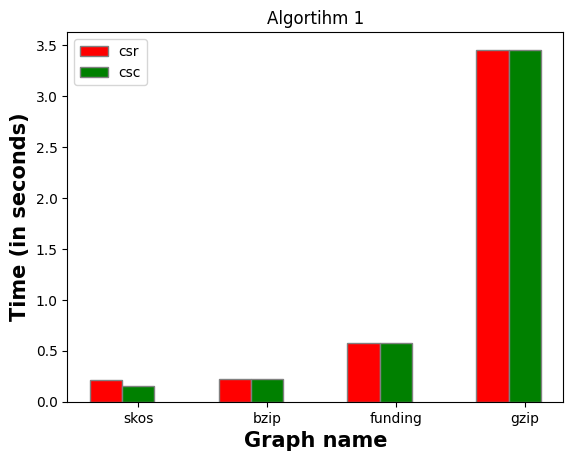

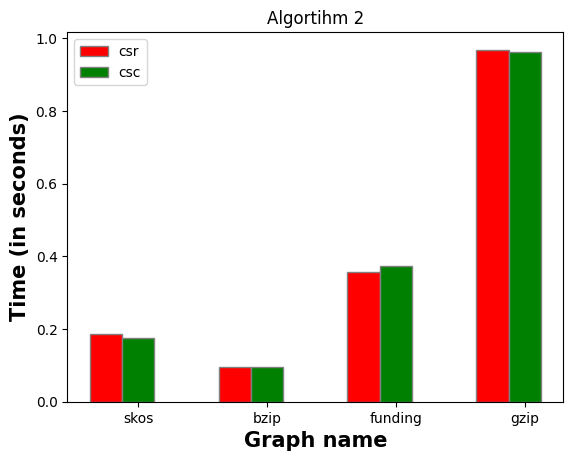

In [51]:
def print_plot_for_results(csr_results, csc_results):
    # set width of bar
    barWidth = 0.25

    # set height of bar
    csr = [data[2][0] for data in csr_results]
    csc = [data[2][0] for data in csc_results]

    # Set position of bar on X axis
    br1 = np.arange(len(csr))
    br2 = [x + barWidth for x in br1]

    # Make the plot
    plt.bar(br1, csr, color ='r', width = barWidth,
            edgecolor ='grey', label ='csr')
    plt.bar(br2, csc, color ='g', width = barWidth,
            edgecolor ='grey', label ='csc')

    # Adding Xticks
    plt.xlabel('Graph name', fontweight ='bold', fontsize = 15)
    plt.ylabel('Time (in seconds)', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(csr))],
            [data[0] for data in csr_results])

    plt.legend()
    plt.show()

plt.title("Algortihm 1")
print_plot_for_results(regular_path_query_csr_results, regular_path_query_csc_results)
plt.title("Algortihm 2")
print_plot_for_results(bfs_based_regular_path_query_csr_results, bfs_based_regular_path_query_csc_results)

### Результат полученный автором

##### Algorithm 1
![](./resources/task5/experiment1/algortihm1.png)

| Graph name | csr (mean + sd) | csc (mean + sd) |
|:----------:|:---------------:|:---------------:|
|    skos    |  0.209 +- 0.097 |  0.151 +- 0.010 |
|    bzip    |  0.226 +- 0.015 |  0.224 +- 0.011 |
|  funding   |  0.574 +- 0.016 |  0.578 +- 0.020 |
|    gzip    |  3.453 +- 0.055 |  3.453 +- 0.072 |

##### Algorithm 2
![](./resources/task5/experiment1/algortihm2.png)

| Graph name | csr (mean + sd) | csc (mean + sd) |
|:----------:|:---------------:|:---------------:|
|    skos    |  0.186 +- 0.038 |  0.176 +- 0.008 |
|    bzip    |  0.097 +- 0.005 |  0.096 +- 0.018 |
|  funding   |  0.358 +- 0.012 |  0.374 +- 0.013 |
|    gzip    |  0.969 +- 0.024 |  0.964 +- 0.016 |

Из полученных данных можно видеть, что на выбранных графах в алгоритмах, реализованных мною для выполнения первых 4 домашних работ, нет существенной разницы, какой вид матриц применять для умножения. Для большинства графов различие в среднем времени выполнения с различными видами матриц связано со случайным выбросом, о чем можно судить по относительно большой величине среднего отклонение.

### Начиная с какого размера начального множества задачу нахождения всех пар достижимых вершин выгоднее решать используя 1 алгоритм, чем 2 алгоритм?

Для ответа на поставленный вопрос проведем замеры, где будем брать различное число начальных вершин в каждом графе (будем брать от 5 % вершин, до 55 % вершин графа для теста):

In [52]:
size_of_start_nodes_in_percent = [i / 100 for i in range(5, 60, 25)]

results_regular_path_query = []
results_bfs_based_regular_path_query = []
for percent in size_of_start_nodes_in_percent:
    for i in range(len(test_graphs)):
        graph = test_graphs[i]
        for regex in test_regexes[i]:
            start_states = list(cfpq_data.generate_multiple_source(graph, int(len(graph.nodes) * percent)))
            results_regular_path_query.append((test_graph_names[i], str(regex), time(lambda: experiment_pass_regular_path_query(regex, graph, start_states=start_states)), percent))
            results_bfs_based_regular_path_query.append((test_graph_names[i], str(regex), time(lambda: experiment_pass_bfs_based_regular_path_query(regex, graph, separated=True, start_states=start_states)), percent))

[2022-10-29 22:19:44]>INFO>Generate set of source vertices of 7 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7fb79de9d6f0> for multiple-source evaluation
[2022-10-29 22:20:32]>INFO>Generate set of source vertices of 7 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7fb79de9d6f0> for multiple-source evaluation
[2022-10-29 22:20:43]>INFO>Generate set of source vertices of 7 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7fb79de9d6f0> for multiple-source evaluation
[2022-10-29 22:20:58]>INFO>Generate set of source vertices of 31 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7fb79dedde10> for multiple-source evaluation
[2022-10-29 22:21:47]>INFO>Generate set of source vertices of 31 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7fb79dedde10> for multiple-source evaluation
[2022-10-29 22:22:24]>INFO>Generate set of source vertices of 31 nodes for graph=<networkx.cl

И распечатаем результат:

In [53]:
rows = []
for i in range(len(results_regular_path_query)):
    data_rpq = results_regular_path_query[i]
    data_bfs_based_rpq = results_bfs_based_regular_path_query[i]
    rows.append([data_rpq[0], ".*" if i % 3 == 0 else data_rpq[1].replace("|", "/"), data_rpq[3], '%.3f +- %.3f' % (data_rpq[2][0], data_rpq[2][1]), '%.3f +- %.3f' % (data_bfs_based_rpq[2][0], data_bfs_based_rpq[2][1]), '%.3f' % (data_rpq[2][0] - data_bfs_based_rpq[2][0])])

print_table(["Graph", "Regex", "Fraction of graph vertices per test", "algorithm 1 (mean + sd)", "algorithm 2 (mean + sd)", "difference (algorithm 1 - algorithm 2)"], rows)

|  Graph  |                Regex                 | Fraction of graph vertices per test | algorithm 1 (mean + sd) | algorithm 2 (mean + sd) | difference (algorithm 1 - algorithm 2) |
|:-------:|:------------------------------------:|:-----------------------------------:|:-----------------------:|:-----------------------:|:--------------------------------------:|
|   skos  |                  .*                  |                 0.05                |      0.137 +- 0.007     |      0.341 +- 0.004     |                 -0.204                 |
|   skos  |             isDefinedBy              |                 0.05                |      0.026 +- 0.003     |      0.089 +- 0.001     |                 -0.063                 |
|   skos  | (isDefinedBy.((isDefinedBy)*.title)) |                 0.05                |      0.030 +- 0.003     |      0.121 +- 0.003     |                 -0.091                 |
|   bzip  |                  .*                  |                 0.05                |  

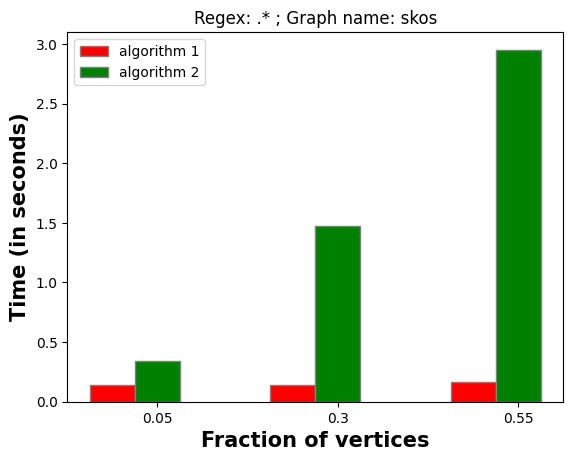

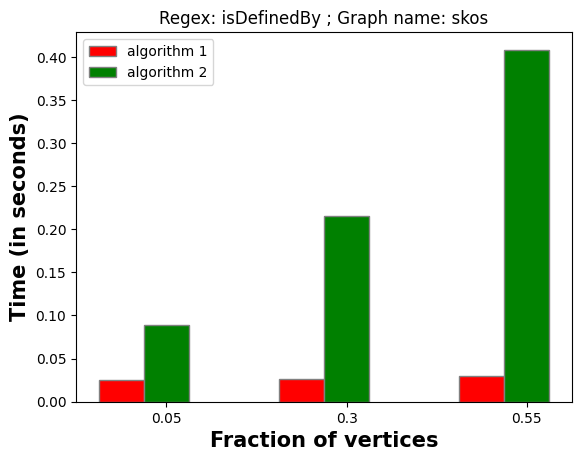

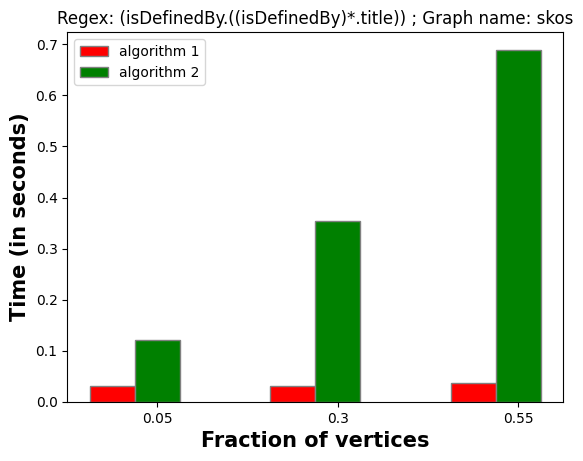

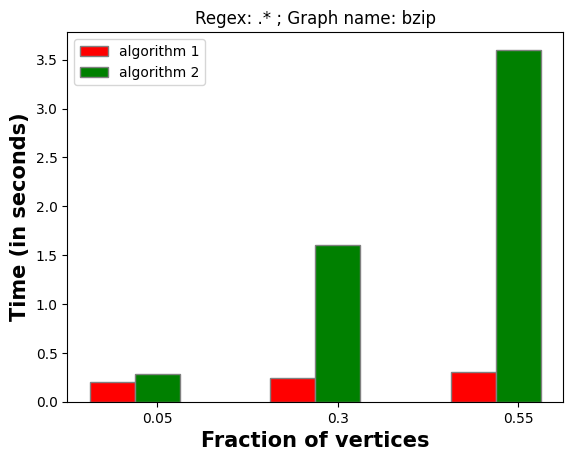

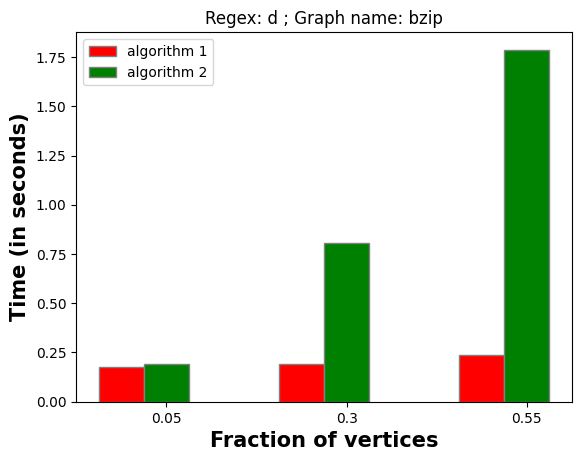

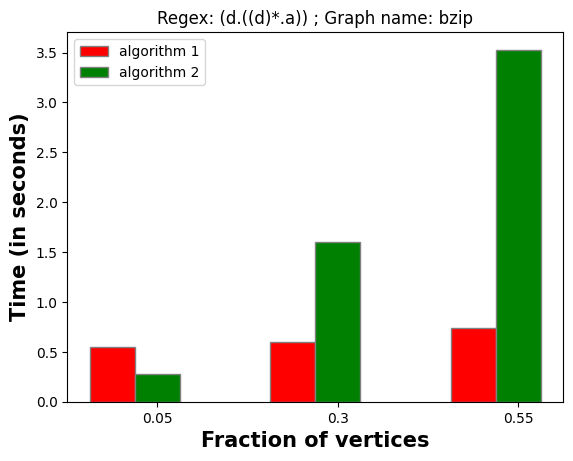

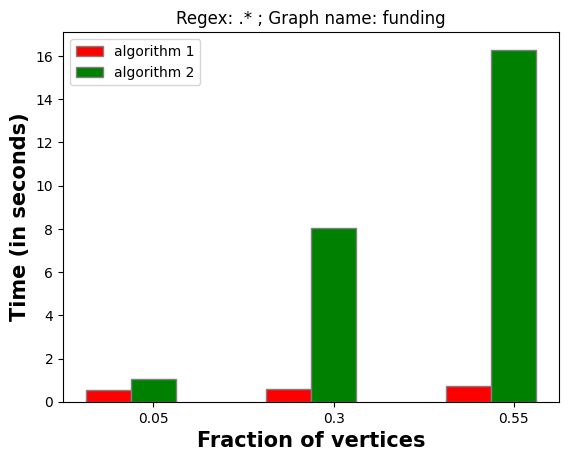

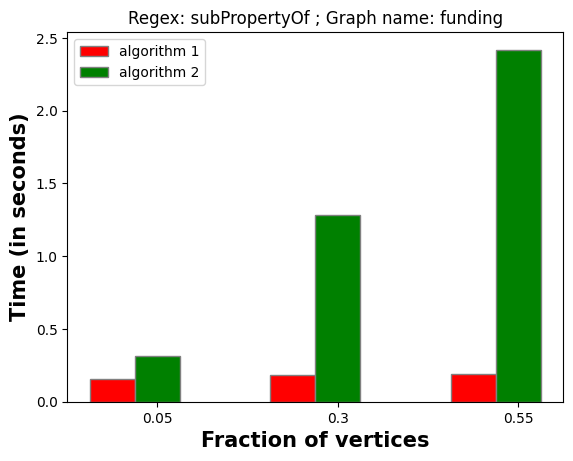

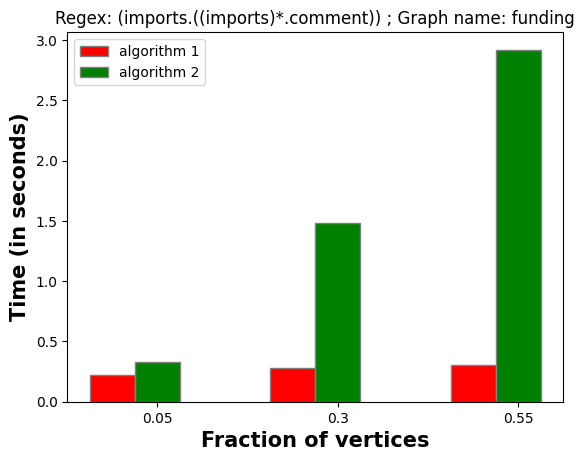

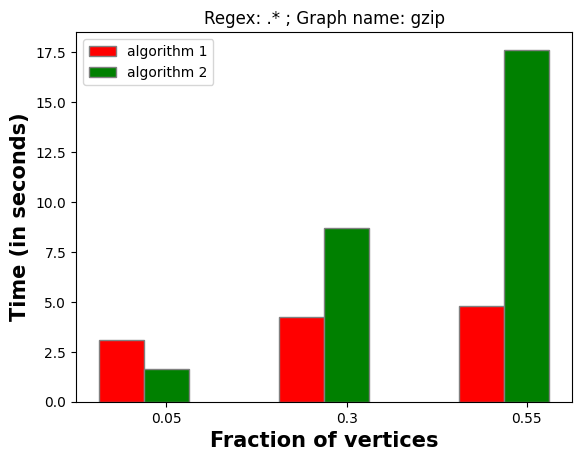

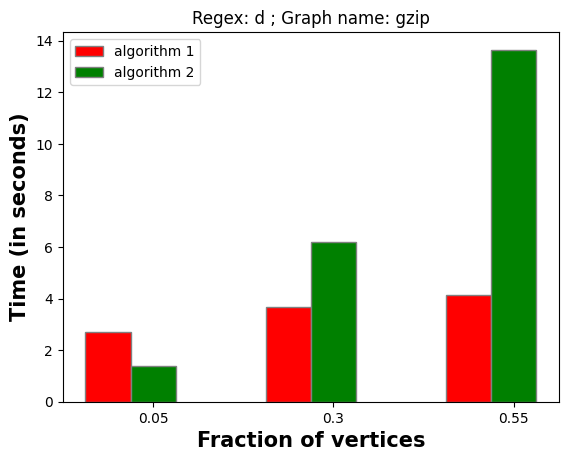

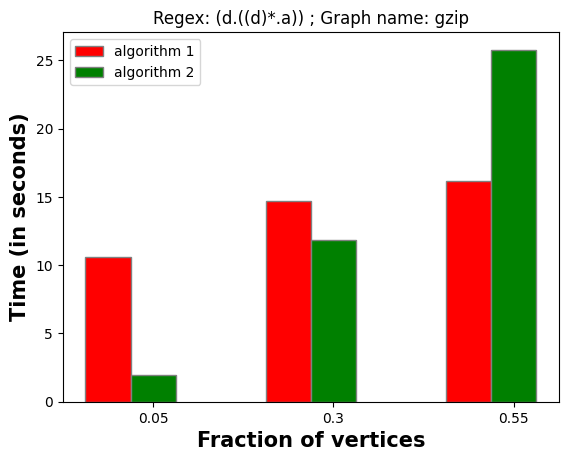

In [54]:
def print_plot_for_results(results_algorithm1, results_algorithm2):
    # set width of bar
    barWidth = 0.25

    # set height of bar
    algo1 = [data[2][0] for data in results_algorithm1]
    algo2 = [data[2][0] for data in results_algorithm2]

    # Set position of bar on X axis
    br1 = np.arange(len(algo1))
    br2 = [x + barWidth for x in br1]

    # Make the plot
    plt.bar(br1, algo1, color ='r', width = barWidth,
            edgecolor ='grey', label ='algorithm 1')
    plt.bar(br2, algo2, color ='g', width = barWidth,
            edgecolor ='grey', label ='algorithm 2')

    # Adding Xticks
    plt.xlabel('Fraction of vertices', fontweight ='bold', fontsize = 15)
    plt.ylabel('Time (in seconds)', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(algo1))],
            [data[3] for data in results_algorithm1])

    plt.legend()
    plt.show()

for k in range(0, 12, 3):
    for j in range(3):
        data_rpq = [results_regular_path_query[i + k + j] for i in range(0, len(results_regular_path_query), 12)]
        data_bfs_based_rpq = [results_bfs_based_regular_path_query[i + k + j] for i in range(0, len(results_bfs_based_regular_path_query), 12)]
        regex = ".*" if j == 0 else data_rpq[0][1].replace("|", "/")
        graph_name = data_rpq[0][0]
        plt.title('Regex: %s ; Graph name: %s' % (regex, graph_name))
        print_plot_for_results(data_rpq, data_bfs_based_rpq)

### Результат полученный автором

|  Graph  |                Regex                 | Fraction of graph vertices per test | algorithm 1 (mean + sd) | algorithm 2 (mean + sd) | difference (algorithm 1 - algorithm 2) |
|:-------:|:------------------------------------:|:-----------------------------------:|:-----------------------:|:-----------------------:|:--------------------------------------:|
|   skos  |                  .*                  |                 0.05                |      0.137 +- 0.007     |      0.341 +- 0.004     |                 -0.204                 |
|   skos  |             isDefinedBy              |                 0.05                |      0.026 +- 0.003     |      0.089 +- 0.001     |                 -0.063                 |
|   skos  | (isDefinedBy.((isDefinedBy)*.title)) |                 0.05                |      0.030 +- 0.003     |      0.121 +- 0.003     |                 -0.091                 |
|   bzip  |                  .*                  |                 0.05                |      0.207 +- 0.005     |      0.279 +- 0.002     |                 -0.073                 |
|   bzip  |                  d                   |                 0.05                |      0.177 +- 0.005     |      0.191 +- 0.003     |                 -0.014                 |
|   bzip  |             (d.((d)*.a))             |                 0.05                |      0.545 +- 0.009     |      0.282 +- 0.002     |                 0.263                  |
| funding |                  .*                  |                 0.05                |      0.530 +- 0.011     |      1.072 +- 0.005     |                 -0.542                 |
| funding |            subPropertyOf             |                 0.05                |      0.155 +- 0.004     |      0.317 +- 0.004     |                 -0.162                 |
| funding |    (imports.((imports)*.comment))    |                 0.05                |      0.225 +- 0.006     |      0.328 +- 0.003     |                 -0.103                 |
|   gzip  |                  .*                  |                 0.05                |      3.097 +- 0.077     |      1.619 +- 0.010     |                 1.478                  |
|   gzip  |                  d                   |                 0.05                |      2.703 +- 0.094     |      1.369 +- 0.008     |                 1.334                  |
|   gzip  |             (d.((d)*.a))             |                 0.05                |     10.587 +- 0.201     |      1.967 +- 0.171     |                 8.620                  |
|   skos  |                  .*                  |                 0.3                 |      0.141 +- 0.002     |      1.473 +- 0.009     |                 -1.332                 |
|   skos  |             isDefinedBy              |                 0.3                 |      0.026 +- 0.002     |      0.216 +- 0.002     |                 -0.189                 |
|   skos  | (isDefinedBy.((isDefinedBy)*.title)) |                 0.3                 |      0.031 +- 0.003     |      0.355 +- 0.004     |                 -0.323                 |
|   bzip  |                  .*                  |                 0.3                 |      0.240 +- 0.006     |      1.601 +- 0.010     |                 -1.361                 |
|   bzip  |                  d                   |                 0.3                 |      0.194 +- 0.004     |      0.806 +- 0.005     |                 -0.612                 |
|   bzip  |             (d.((d)*.a))             |                 0.3                 |      0.600 +- 0.010     |      1.597 +- 0.011     |                 -0.996                 |
| funding |                  .*                  |                 0.3                 |      0.604 +- 0.009     |      8.023 +- 0.432     |                 -7.419                 |
| funding |            subPropertyOf             |                 0.3                 |      0.183 +- 0.010     |      1.281 +- 0.053     |                 -1.097                 |
| funding |    (imports.((imports)*.comment))    |                 0.3                 |      0.282 +- 0.010     |      1.480 +- 0.029     |                 -1.198                 |
|   gzip  |                  .*                  |                 0.3                 |      4.268 +- 0.062     |      8.722 +- 0.114     |                 -4.454                 |
|   gzip  |                  d                   |                 0.3                 |      3.681 +- 0.048     |      6.176 +- 0.063     |                 -2.495                 |
|   gzip  |             (d.((d)*.a))             |                 0.3                 |     14.669 +- 0.224     |     11.876 +- 0.140     |                 2.794                  |
|   skos  |                  .*                  |                 0.55                |      0.165 +- 0.007     |      2.951 +- 0.050     |                 -2.786                 |
|   skos  |             isDefinedBy              |                 0.55                |      0.030 +- 0.003     |      0.408 +- 0.015     |                 -0.378                 |
|   skos  | (isDefinedBy.((isDefinedBy)*.title)) |                 0.55                |      0.038 +- 0.004     |      0.689 +- 0.031     |                 -0.652                 |
|   bzip  |                  .*                  |                 0.55                |      0.300 +- 0.013     |      3.602 +- 0.055     |                 -3.302                 |
|   bzip  |                  d                   |                 0.55                |      0.237 +- 0.008     |      1.787 +- 0.036     |                 -1.551                 |
|   bzip  |             (d.((d)*.a))             |                 0.55                |      0.743 +- 0.017     |      3.528 +- 0.051     |                 -2.785                 |
| funding |                  .*                  |                 0.55                |      0.723 +- 0.034     |     16.293 +- 0.149     |                -15.570                 |
| funding |            subPropertyOf             |                 0.55                |      0.190 +- 0.009     |      2.418 +- 0.112     |                 -2.229                 |
| funding |    (imports.((imports)*.comment))    |                 0.55                |      0.308 +- 0.011     |      2.920 +- 0.049     |                 -2.612                 |
|   gzip  |                  .*                  |                 0.55                |      4.773 +- 0.055     |     17.633 +- 0.139     |                -12.859                 |
|   gzip  |                  d                   |                 0.55                |      4.127 +- 0.055     |     13.651 +- 0.158     |                 -9.524                 |
|   gzip  |             (d.((d)*.a))             |                 0.55                |     16.190 +- 0.283     |     25.787 +- 0.207     |                 -9.597                 |

Те же данные, но для наглядности для каждого типа регулярного выражения и графа построен столбчатый график, сравнивающий время работы двух алгоритмов при различном размере начального множества

![](./resources/task5/experiment2/1.png) ![](./resources/task5/experiment2/2.png) ![](./resources/task5/experiment2/3.png)
![](./resources/task5/experiment2/4.png) ![](./resources/task5/experiment2/5.png) ![](./resources/task5/experiment2/6.png)
![](./resources/task5/experiment2/7.png) ![](./resources/task5/experiment2/8.png) ![](./resources/task5/experiment2/9.png)
![](./resources/task5/experiment2/10.png) ![](./resources/task5/experiment2/11.png) ![](./resources/task5/experiment2/12.png)

Из полученных данных можно видеть, что на выбранных графах реализованный мной 2 алгоритм в среднем показывает себя хуже на любом количестве начальных вершин, даже маленьком. Только на графе gzip при маленьком количестве начальных вершин и на определенных регулярных выражениях получилось выиграть по скорости алгоритмом 2 у алгоритма 1, однако наиболее вероятно это просто связано с удачно выбранным регулярным выражением, которое не привело к долгому поиску в ширину.

### На сколько реализация 2 алгоритм медленнее работает, если необходимо найти множества достижимых вершин для каждой из вершин начального множества?

Для ответа на поставленный вопрос проведем замеры, где будем брать различное число вершин в каждом графе (будем брать от 5 % вершин, до 55 % вершин для теста):

In [55]:
size_of_start_nodes_in_percent = [i / 100 for i in range(5, 60, 25)]

results_separated_true = []
results_separated_false = []
for percent in size_of_start_nodes_in_percent:
    for i in range(len(test_graphs)):
        graph = test_graphs[i]
        for regex in test_regexes[i]:
            start_states = list(cfpq_data.generate_multiple_source(graph, int(len(graph.nodes) * percent)))
            results_separated_true.append((test_graph_names[i], str(regex), time(lambda: experiment_pass_bfs_based_regular_path_query(regex, graph, separated=True, start_states=start_states)), percent))
            results_separated_false.append((test_graph_names[i], str(regex), time(lambda: experiment_pass_bfs_based_regular_path_query(regex, graph, separated=False, start_states=start_states)), percent))

[2022-10-30 04:17:09]>INFO>Generate set of source vertices of 7 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7fb79de9d6f0> for multiple-source evaluation
[2022-10-30 04:17:46]>INFO>Generate set of source vertices of 7 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7fb79de9d6f0> for multiple-source evaluation
[2022-10-30 04:18:02]>INFO>Generate set of source vertices of 7 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7fb79de9d6f0> for multiple-source evaluation
[2022-10-30 04:18:22]>INFO>Generate set of source vertices of 31 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7fb79dedde10> for multiple-source evaluation
[2022-10-30 04:19:00]>INFO>Generate set of source vertices of 31 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7fb79dedde10> for multiple-source evaluation
[2022-10-30 04:19:29]>INFO>Generate set of source vertices of 31 nodes for graph=<networkx.cl

И распечатаем результат (после Separated отвечает выбору режима работы второго алгоритма. Если Separated == true, то необходимо найти множества достижимых вершин для каждой из вершин начального множества):

In [56]:
rows = []
for i in range(len(results_separated_true)):
    data_true = results_separated_true[i]
    data_false = results_separated_false[i]
    rows.append([data_true[0], ".*" if i % 3 == 0 else data_true[1].replace("|", "/"), data_true[3], '%.3f +- %.3f' % (data_true[2][0], data_true[2][1]), '%.3f +- %.3f' % (data_false[2][0], data_false[2][1])])

print_table(["Graph", "Regex", "Fraction of graph vertices per test", "separated == true (mean + sd)", "separated == false (mean + sd)"], rows)

|  Graph  |                Regex                 | Fraction of graph vertices per test | separated == true (mean + sd) | separated == false (mean + sd) |
|:-------:|:------------------------------------:|:-----------------------------------:|:-----------------------------:|:------------------------------:|
|   skos  |                  .*                  |                 0.05                |         0.213 +- 0.008        |         0.155 +- 0.002         |
|   skos  |             isDefinedBy              |                 0.05                |         0.090 +- 0.003        |         0.069 +- 0.001         |
|   skos  | (isDefinedBy.((isDefinedBy)*.title)) |                 0.05                |         0.120 +- 0.004        |         0.083 +- 0.001         |
|   bzip  |                  .*                  |                 0.05                |         0.260 +- 0.021        |         0.115 +- 0.001         |
|   bzip  |                  d                   |                 0.05     

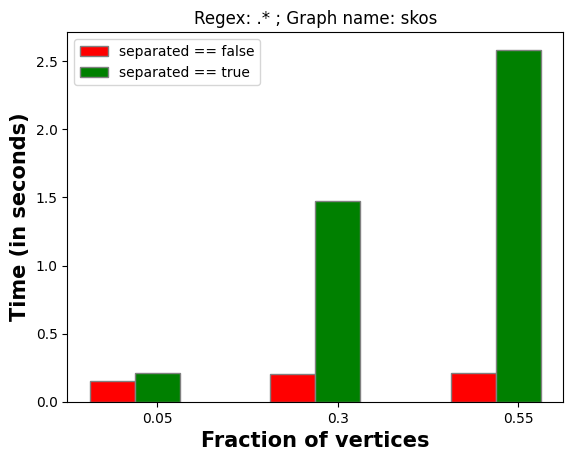

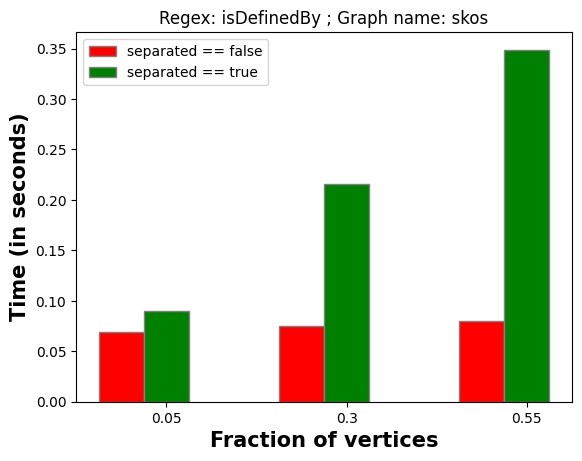

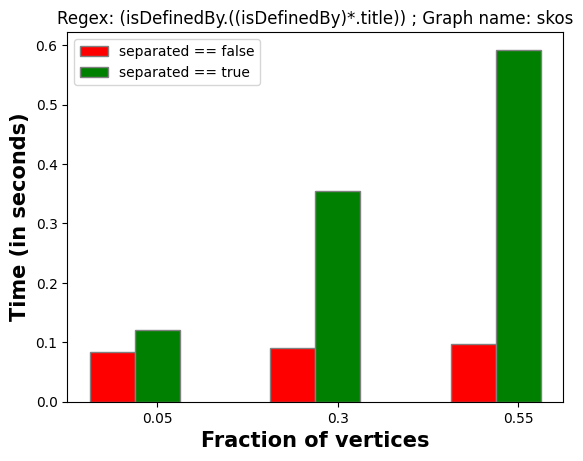

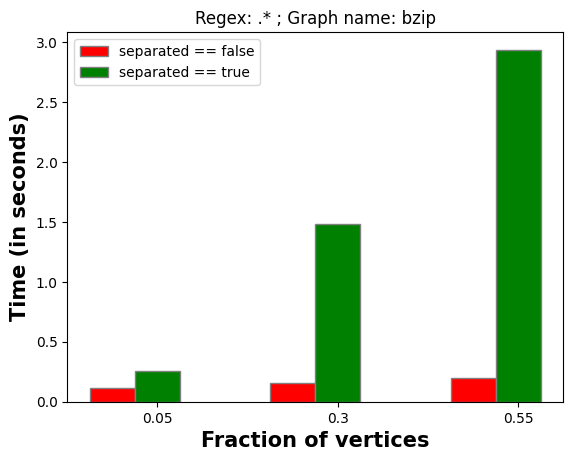

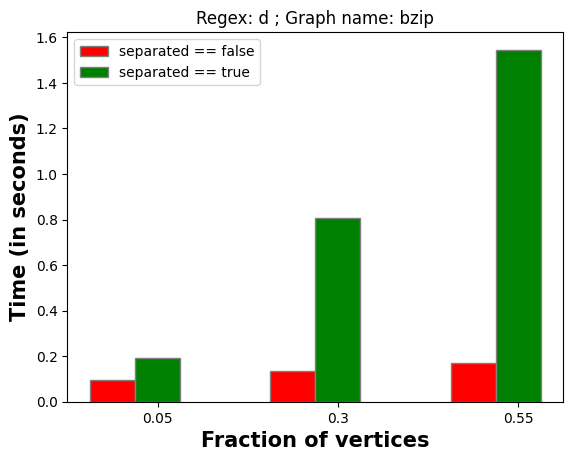

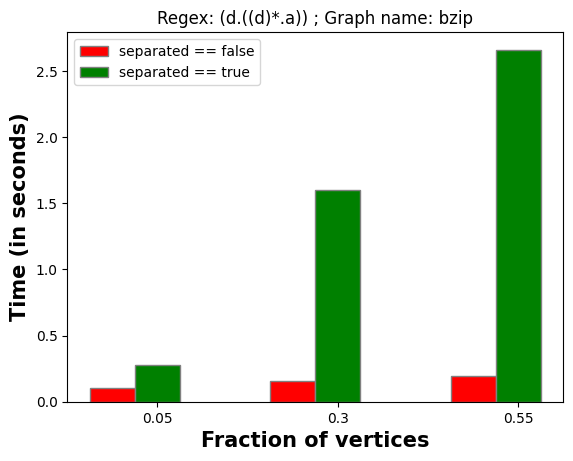

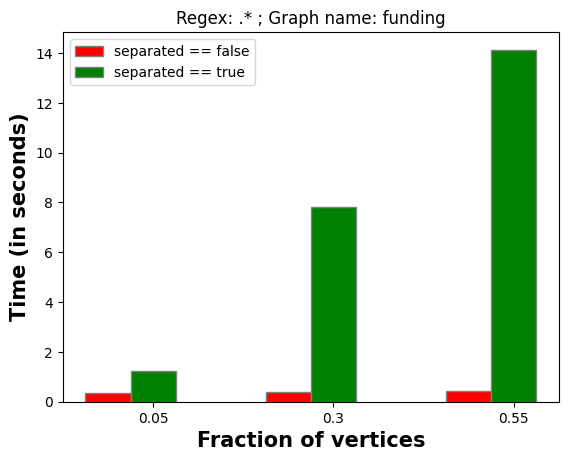

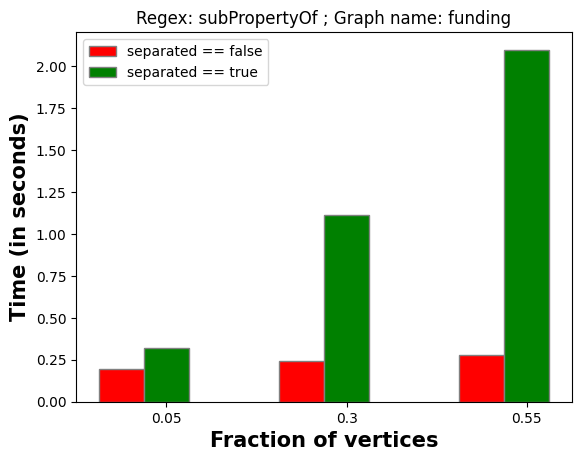

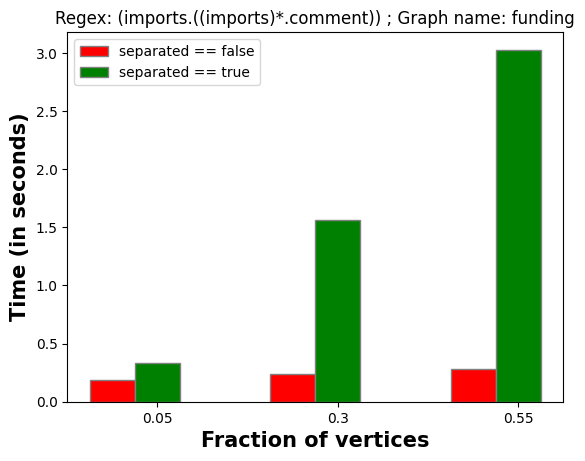

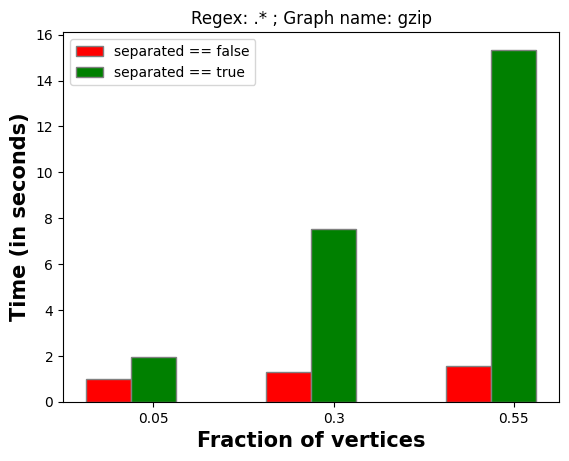

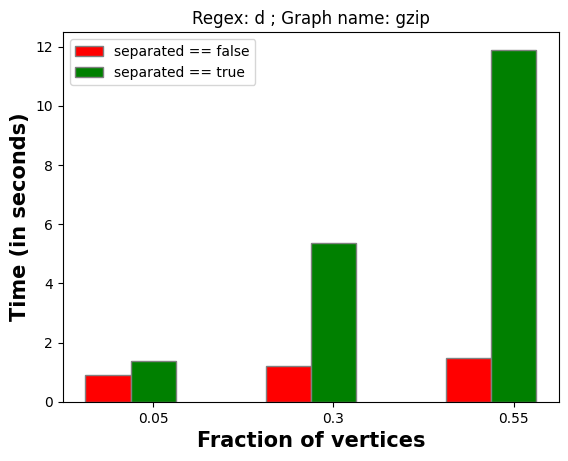

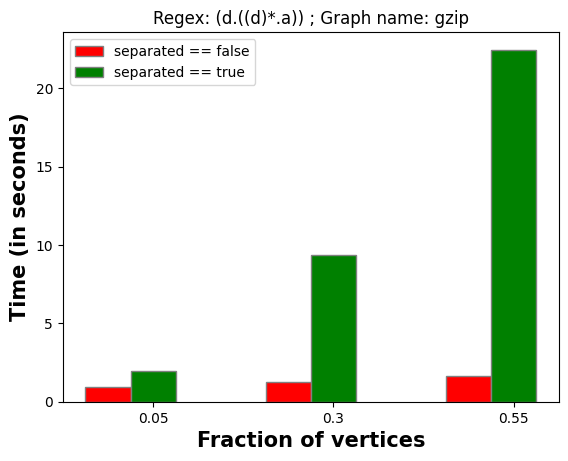

In [57]:
def print_plot_for_results(results_algorithm1, results_algorithm2):
    # set width of bar
    barWidth = 0.25

    # set height of bar
    algo1 = [data[2][0] for data in results_algorithm1]
    algo2 = [data[2][0] for data in results_algorithm2]

    # Set position of bar on X axis
    br1 = np.arange(len(algo1))
    br2 = [x + barWidth for x in br1]

    # Make the plot
    plt.bar(br1, algo1, color ='r', width = barWidth,
            edgecolor ='grey', label ='separated == false')
    plt.bar(br2, algo2, color ='g', width = barWidth,
            edgecolor ='grey', label ='separated == true')

    # Adding Xticks
    plt.xlabel('Fraction of vertices', fontweight ='bold', fontsize = 15)
    plt.ylabel('Time (in seconds)', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(algo1))],
            [data[3] for data in results_algorithm1])

    plt.legend()
    plt.show()

for k in range(0, 12, 3):
    for j in range(3):
        data_false = [results_separated_false[i + k + j] for i in range(0, len(results_regular_path_query), 12)]
        data_true = [results_separated_true[i + k + j] for i in range(0, len(results_bfs_based_regular_path_query), 12)]
        regex = ".*" if j == 0 else data_false[0][1].replace("|", "/")
        graph_name = data_false[0][0]
        plt.title('Regex: %s ; Graph name: %s' % (regex, graph_name))
        print_plot_for_results(data_false, data_true)

### Результат полученный автором

|  Graph  |                Regex                 | Fraction of graph vertices per test | separated == true (mean + sd) | separated == false (mean + sd) |
|:-------:|:------------------------------------:|:-----------------------------------:|:-----------------------------:|:------------------------------:|
|   skos  |                  .*                  |                 0.05                |         0.213 +- 0.008        |         0.155 +- 0.002         |
|   skos  |             isDefinedBy              |                 0.05                |         0.090 +- 0.003        |         0.069 +- 0.001         |
|   skos  | (isDefinedBy.((isDefinedBy)*.title)) |                 0.05                |         0.120 +- 0.004        |         0.083 +- 0.001         |
|   bzip  |                  .*                  |                 0.05                |         0.260 +- 0.021        |         0.115 +- 0.001         |
|   bzip  |                  d                   |                 0.05                |         0.192 +- 0.006        |         0.096 +- 0.002         |
|   bzip  |             (d.((d)*.a))             |                 0.05                |         0.281 +- 0.005        |         0.104 +- 0.002         |
| funding |                  .*                  |                 0.05                |         1.231 +- 0.007        |         0.332 +- 0.004         |
| funding |            subPropertyOf             |                 0.05                |         0.318 +- 0.004        |         0.198 +- 0.001         |
| funding |    (imports.((imports)*.comment))    |                 0.05                |         0.330 +- 0.005        |         0.187 +- 0.004         |
|   gzip  |                  .*                  |                 0.05                |         1.963 +- 0.012        |         0.984 +- 0.008         |
|   gzip  |                  d                   |                 0.05                |         1.374 +- 0.025        |         0.912 +- 0.007         |
|   gzip  |             (d.((d)*.a))             |                 0.05                |         1.931 +- 0.025        |         0.940 +- 0.007         |
|   skos  |                  .*                  |                 0.3                 |         1.476 +- 0.010        |         0.200 +- 0.001         |
|   skos  |             isDefinedBy              |                 0.3                 |         0.216 +- 0.005        |         0.075 +- 0.001         |
|   skos  | (isDefinedBy.((isDefinedBy)*.title)) |                 0.3                 |         0.355 +- 0.005        |         0.090 +- 0.001         |
|   bzip  |                  .*                  |                 0.3                 |         1.485 +- 0.009        |         0.158 +- 0.004         |
|   bzip  |                  d                   |                 0.3                 |         0.808 +- 0.009        |         0.134 +- 0.005         |
|   bzip  |             (d.((d)*.a))             |                 0.3                 |         1.599 +- 0.008        |         0.154 +- 0.003         |
| funding |                  .*                  |                 0.3                 |         7.808 +- 0.069        |         0.403 +- 0.005         |
| funding |            subPropertyOf             |                 0.3                 |         1.112 +- 0.016        |         0.240 +- 0.003         |
| funding |    (imports.((imports)*.comment))    |                 0.3                 |         1.562 +- 0.008        |         0.241 +- 0.003         |
|   gzip  |                  .*                  |                 0.3                 |         7.529 +- 0.029        |         1.305 +- 0.010         |
|   gzip  |                  d                   |                 0.3                 |         5.368 +- 0.049        |         1.195 +- 0.009         |
|   gzip  |             (d.((d)*.a))             |                 0.3                 |         9.380 +- 0.032        |         1.278 +- 0.011         |
|   skos  |                  .*                  |                 0.55                |         2.585 +- 0.055        |         0.210 +- 0.003         |
|   skos  |             isDefinedBy              |                 0.55                |         0.349 +- 0.002        |         0.080 +- 0.002         |
|   skos  | (isDefinedBy.((isDefinedBy)*.title)) |                 0.55                |         0.592 +- 0.003        |         0.096 +- 0.002         |
|   bzip  |                  .*                  |                 0.55                |         2.936 +- 0.026        |         0.196 +- 0.004         |
|   bzip  |                  d                   |                 0.55                |         1.546 +- 0.008        |         0.169 +- 0.003         |
|   bzip  |             (d.((d)*.a))             |                 0.55                |         2.661 +- 0.010        |         0.194 +- 0.003         |
| funding |                  .*                  |                 0.55                |        14.133 +- 0.047        |         0.422 +- 0.005         |
| funding |            subPropertyOf             |                 0.55                |         2.097 +- 0.023        |         0.279 +- 0.002         |
| funding |    (imports.((imports)*.comment))    |                 0.55                |         3.027 +- 0.014        |         0.281 +- 0.005         |
|   gzip  |                  .*                  |                 0.55                |        15.347 +- 0.088        |         1.556 +- 0.025         |
|   gzip  |                  d                   |                 0.55                |        11.892 +- 0.061        |         1.470 +- 0.011         |
|   gzip  |             (d.((d)*.a))             |                 0.55                |        22.473 +- 0.110        |         1.615 +- 0.013         |

Те же данные, но для наглядности для каждого типа регулярного выражения и графа построен столбчатый график, сравнивающий время работы алгоритма в двух различных режимах при различном размере начального множества

![](./resources/task5/experiment3/1.png) ![](./resources/task5/experiment3/2.png) ![](./resources/task5/experiment3/3.png)
![](./resources/task5/experiment3/4.png) ![](./resources/task5/experiment3/5.png) ![](./resources/task5/experiment3/6.png)
![](./resources/task5/experiment3/7.png) ![](./resources/task5/experiment3/8.png) ![](./resources/task5/experiment3/9.png)
![](./resources/task5/experiment3/10.png) ![](./resources/task5/experiment3/11.png) ![](./resources/task5/experiment3/12.png)

Из полученных данных можно видеть, что на выбранных графах реализованный мной 2 алгоритм в режиме "нахождения достижимых вершин из множества начальных" (далее совместный режим) работает быстрее, чем в режиме "нахождения множества достижимых вершин для каждой вершины из множества начальных" (далее раздельный режим). Это ожидаемый результат, так как в "совместном" режиме на каждой итерации алгоритма выполняется намного меньше матричных умножений, а также другие матричные операции работают быстрее в силу меньшего размера самих используемых матриц.

# Заключение

Таким образом, благодаря поставленным экспериментам можно подвести итог по поставленным вопросам:
1. Какое представление разреженных матриц лучше подходит для каждой реализации алгоритма?
    Ответ: на предложенных реализациях алгоритмов разница между различными представлениями разреженных матриц несущественна
2. Начиная с какого размера начального множества задачу нахождения всех пар достижимых вершин выгоднее решать используя 1 алгоритм, чем 2 алгоритм?
    Ответ: в среднем на любом размере начального множества предложенная реализация первого алгоритма быстрее, чем предложенная реализация 2
3. На сколько реализация 2 алгоритм медленнее работает, если необходимо найти множества достижимых вершин для каждой из вершин начального множества?
    Ответ: реализация 2 алгоритма работает существенно медленнее, если необходимо найти множества достижимых вершин для каждой из вершин начального множества. Более подробное сравнение времени работы можно посмотреть в соответствующем разделе.